In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns


iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['target'] = iris.target_names[iris.target]
df.sample(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
107,7.3,2.9,6.3,1.8,virginica
90,5.5,2.6,4.4,1.2,versicolor
20,5.4,3.4,1.7,0.2,setosa
88,5.6,3.0,4.1,1.3,versicolor


In [40]:
X, y, target_names = iris.data[:,:1], iris.target, iris.target_names
y[y>1] = 1
target_names = np.array([target_names[0], 'other'])

In [41]:
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [42]:
target_names

array(['setosa', 'other'], dtype='<U6')

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=666)

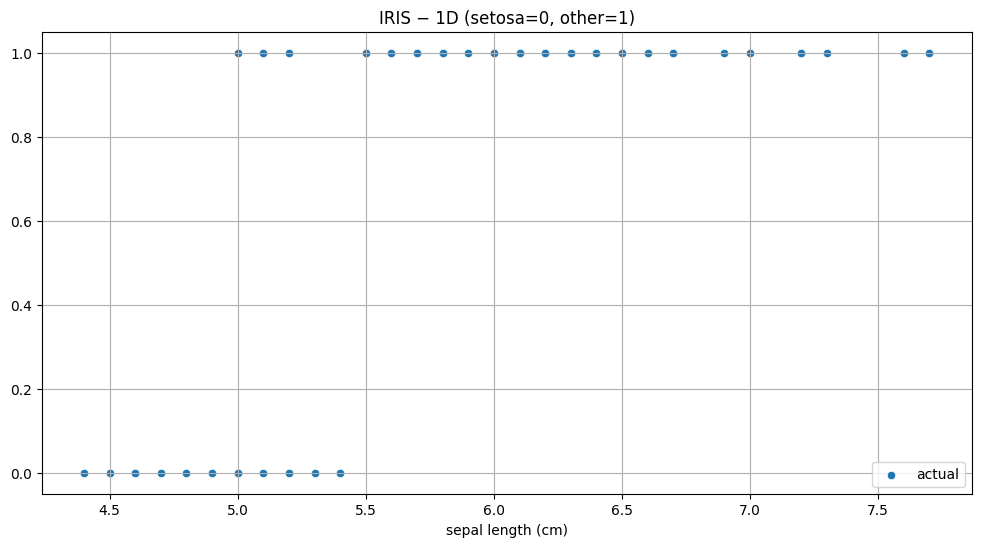

In [44]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=X_test.T[0],y=y_test, label="actual")
plt.xlabel(iris.feature_names[0])
plt.title("IRIS − 1D (setosa=0, other=1)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

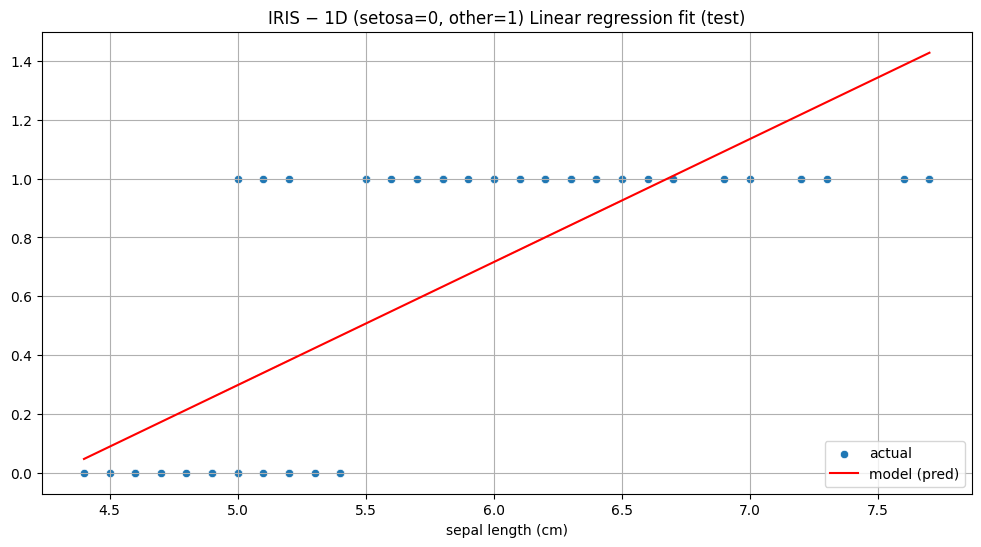

In [46]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=X_test.T[0],y=y_test, label="actual")
sns.lineplot(x=X_test.T[0], y=y_pred, color='red', label="model (pred)")
plt.xlabel(iris.feature_names[0])
plt.title("IRIS − 1D (setosa=0, other=1) Linear regression fit (test)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [47]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)
y_prob[:5,:]

array([[0.36106274, 0.63893726],
       [0.24038055, 0.75961945],
       [0.76292166, 0.23707834],
       [0.24038055, 0.75961945],
       [0.91120554, 0.08879446]])

In [48]:
y_log_prob = model.predict_log_proba(X_test)
y_log_prob[:5,:]

array([[-1.01870355, -0.44794901],
       [-1.42553199, -0.27493769],
       [-0.27059992, -1.43936465],
       [-1.42553199, -0.27493769],
       [-0.09298679, -2.42143102]])

In [51]:
df_cm = pd.crosstab(target_names[y_test],target_names[y_pred])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
df_cm

Predicted,other,setosa
Actual,,
other,38,3
setosa,0,19
